<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/ann/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mydata.csv to mydata.csv


In [ ]:
#loading data
data = pd.read_csv('mydata.csv')

In [ ]:
data

,temperature,humidity,ph,rainfall,Irrigation
0,22.613600,63.690706,5.749914,87.759539,0
1,26.100184,71.574769,6.931757,102.266244,0
2,23.558821,71.593514,6.657965,66.719955,0
3,19.972160,57.682729,6.596061,60.651715,0
4,18.478913,62.695039,5.970458,65.438354,0
...,...,...,...,...,...
495,22.107190,78.583201,6.364730,74.941366,0
496,23.038140,76.110215,6.913679,91.496975,1
497,24.547953,75.397527,7.766260,63.880799,0
498,23.738680,75.775038,7.556064,76.636692,0


In [ ]:
#assigning values to features as X and target as y
X=data.drop(["Irrigation"],axis=1)
y=data["Irrigation"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,500.0,1.705303e-16,1.001002,-2.415569,-0.648069,0.058113,0.861301,1.908230
humidity,500.0,4.547474e-16,1.001002,-1.853276,-0.617657,0.183979,0.884711,1.249491
ph,500.0,8.526513e-17,1.001002,-2.972510,-0.655418,-0.071710,0.484279,3.425073
rainfall,500.0,-1.705303e-16,1.001002,-1.604551,-0.769099,-0.152912,0.624382,2.807094


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 1s 33ms/step - loss: 0.6930 - accuracy: 0.5400 - val_loss: 0.6919 - val_accuracy: 0.6667
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5800 - val_loss: 0.6906 - val_accuracy: 0.6667
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.5800 - val_loss: 0.6892 - val_accuracy: 0.6667
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5800 - val_loss: 0.6879 - val_accuracy: 0.6667
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.5800 - val_loss: 0.6868 - val_accuracy: 0.6667
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5800 - val_loss: 0.6859 - val_accuracy: 0.6667
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5800 - val_loss: 0.6846 - val_accuracy: 0.6667
Epoch 8/500


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 66.67%


In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

4/4 [==============================] - 0s 4ms/step


In [ ]:
y_test

308    0
13     0
414    0
32     0
460    0
      ..
41     1
340    1
187    1
326    0
333    0
Name: Irrigation, Length: 125, dtype: int64

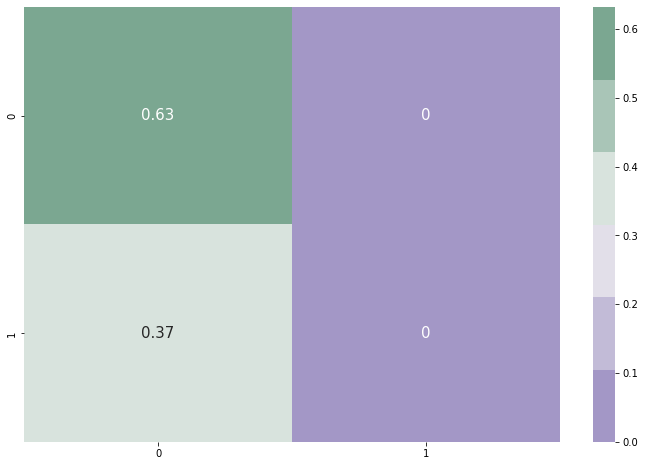

In [ ]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})